In [23]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

(-0.5, 299.5, 291.5, -0.5)

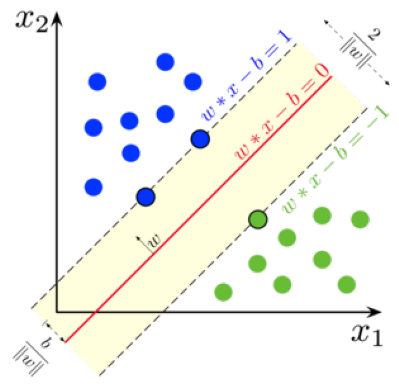

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as img

imagem = img.imread('SVC.png')
plt.imshow(imagem)
plt.axis('off') 

In [25]:
credito = pd.read_csv('Credit.csv')
credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [26]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [27]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [28]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.2,
                                                                  random_state = 1)

In [29]:
svm = SVC()
svm.fit(X_treinamento, y_treinamento)

SVC()

In [30]:
previsoes = svm.predict(X_teste)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.71

# SELECIONADO MELHORES ATRIBUTOS

In [31]:
# Utilização do algoritmo ExtraTreesClassifier para extrair as características mais importantes
forest = ExtraTreesClassifier()
forest.fit(X_treinamento, y_treinamento)

importancias = forest.feature_importances_
importancias

array([0.10759285, 0.08068341, 0.06440922, 0.0555751 , 0.08579848,
       0.05099615, 0.05039699, 0.05102102, 0.04233772, 0.02657233,
       0.05133581, 0.04786227, 0.06956504, 0.04061607, 0.03559905,
       0.03236948, 0.04484183, 0.02457413, 0.028971  , 0.00888206])

In [32]:
# Criação de nova base de dados utilizando somente os atributos mais importantes
X_treinamento2 = X_treinamento[:, [0, 1, 2, 3]]
X_teste2 = X_teste[:, [0, 1, 2, 3]]

In [33]:
# Criar de outro modelo com a base de dados reduzida, treinamento e obtençaão das previsões e taxa de acerto
svm2 = SVC()
svm2.fit(X_treinamento2, y_treinamento)

previsoes2 = svm2.predict(X_teste2)

taxa_acerto = accuracy_score(y_teste, previsoes2)
taxa_acerto

0.715